# Data Preparation - Part 2

#### Python Imports

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
%matplotlib inline
plt.style.use('seaborn')

#### Data dictionary for the data set

[Housing prices in Ames, Iowa - Feature details](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Feature Engineering - Data Imputation

#### Load the Ames Iowa Housing Prices Data Set

In [150]:
url = './data/ames.csv'
ames_df = pd.read_csv(url)

#### Features to drop

- Identifiers and add no values : Order, PID
- Lots of missing values : Pool.QC, Misc.Feature, Alley, Fence
- Low correlation to target : MS.SubClass, Lot.Frontage, Lot.Area, Overall.Cond, BsmtFin.SF.1, BsmtFin.SF.2, Bsmt.Unit.SF, X2nd.Flr.SF, Low.Qual.Fin.SF, Bsmt.Full.Bath, Bsmt.Half.Bath, Half.Bath, Bedroom.AbvGr, Kitchen.AbvGr, Fireplaces, Wood.Deck.SF, Open.Porch.SF, Enclosed.Porch, X3Ssn.Porch, Screen.Porch, Pool.Area, Misc.Val, Mo.Sold, Yr.Sold

In [151]:
home_price_df = ames_df.drop(['Order', 'PID', 'Pool.QC', 'Misc.Feature', 'Alley', 'Fence', 'MS.SubClass', 'Lot.Frontage', 'Lot.Area', 'Overall.Cond', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Fireplaces', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold', 'Yr.Sold'], axis=1)

#### Display the shape (rows, columns) of the data set

In [152]:
home_price_df.shape

(2930, 51)

#### Display the feature information about the data set

In [153]:
home_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS.Zoning       2930 non-null   object 
 1   Street          2930 non-null   object 
 2   Lot.Shape       2930 non-null   object 
 3   Land.Contour    2930 non-null   object 
 4   Utilities       2930 non-null   object 
 5   Lot.Config      2930 non-null   object 
 6   Land.Slope      2930 non-null   object 
 7   Neighborhood    2930 non-null   object 
 8   Condition.1     2930 non-null   object 
 9   Condition.2     2930 non-null   object 
 10  Bldg.Type       2930 non-null   object 
 11  House.Style     2930 non-null   object 
 12  Overall.Qual    2930 non-null   int64  
 13  Year.Built      2930 non-null   int64  
 14  Year.Remod.Add  2930 non-null   int64  
 15  Roof.Style      2930 non-null   object 
 16  Roof.Matl       2930 non-null   object 
 17  Exterior.1st    2930 non-null   o

#### Display the name of the features with missing values

In [154]:
features_na = [feature for feature in home_price_df.columns if home_price_df[feature].isnull().sum() > 0]
features_na

['Mas.Vnr.Type',
 'Mas.Vnr.Area',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Total.Bsmt.SF',
 'Electrical',
 'Fireplace.Qu',
 'Garage.Type',
 'Garage.Yr.Blt',
 'Garage.Finish',
 'Garage.Cars',
 'Garage.Area',
 'Garage.Qual',
 'Garage.Cond']

#### Display the count of values that are missing (take 1)

In [155]:
home_price_df[features_na].isnull().sum().sort_values()

Electrical           1
Garage.Area          1
Garage.Cars          1
Total.Bsmt.SF        1
Mas.Vnr.Type        23
Mas.Vnr.Area        23
BsmtFin.Type.1      80
Bsmt.Cond           80
Bsmt.Qual           80
BsmtFin.Type.2      81
Bsmt.Exposure       83
Garage.Type        157
Garage.Qual        159
Garage.Yr.Blt      159
Garage.Finish      159
Garage.Cond        159
Fireplace.Qu      1422
dtype: int64

#### Display the rows with one missing value - Garage.Cars, Garage.Area, Total.Bsmt.SF, Electrical

In [156]:
home_price_df[home_price_df['Garage.Cars'].isnull() | home_price_df['Garage.Area'].isnull() | home_price_df['Total.Bsmt.SF'].isnull() | home_price_df['Electrical'].isnull()]

,MS.Zoning,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,...,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Sale.Type,Sale.Condition,SalePrice
1341,RM,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,...,1946.0,Unf,1.0,280.0,TA,TA,Y,ConLD,Abnorml,79000
1577,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,2007.0,Fin,2.0,400.0,TA,TA,Y,WD,Normal,167500
2236,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,WD,Alloca,150909


#### Drop the 3 rows with one missing value from above

In [157]:
one_na_index = home_price_df[home_price_df['Garage.Cars'].isnull() | home_price_df['Garage.Area'].isnull() | home_price_df['Total.Bsmt.SF'].isnull() | home_price_df['Electrical'].isnull()].index
home_price_df = home_price_df.drop(one_na_index, axis=0)

#### Display the count of values that are missing (take 2)

In [158]:
features_na = [feature for feature in home_price_df.columns if home_price_df[feature].isnull().sum() > 0]
home_price_df[features_na].isnull().sum().sort_values()

Mas.Vnr.Type        23
Mas.Vnr.Area        23
Bsmt.Qual           79
Bsmt.Cond           79
BsmtFin.Type.1      79
BsmtFin.Type.2      80
Bsmt.Exposure       82
Garage.Type        157
Garage.Yr.Blt      158
Garage.Finish      158
Garage.Qual        158
Garage.Cond        158
Fireplace.Qu      1419
dtype: int64

#### Display the rows with 23 missing values - Mas.Vnr.Type and Mas.Vnr.Area

In [159]:
home_price_df[home_price_df['Mas.Vnr.Type'].isnull() | home_price_df['Mas.Vnr.Area'].isnull()]

,MS.Zoning,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,...,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Sale.Type,Sale.Condition,SalePrice
55,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,2002.0,Fin,2.0,440.0,TA,TA,Y,WD,Normal,216500
484,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,2002.0,Fin,3.0,644.0,TA,TA,Y,WD,Normal,257500
517,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,2008.0,Fin,2.0,529.0,TA,TA,Y,New,Partial,225000
538,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,2003.0,RFn,2.0,555.0,TA,TA,Y,WD,Normal,184900
867,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2002.0,RFn,2.0,550.0,TA,TA,Y,WD,Normal,198500
1095,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,...,2002.0,Fin,2.0,403.0,TA,TA,Y,WD,Normal,176000
1119,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,...,2006.0,Fin,2.0,480.0,TA,TA,Y,WD,Normal,247000
1122,FV,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,...,2007.0,Fin,2.0,480.0,TA,TA,Y,New,Partial,182000
1127,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,2007.0,RFn,2.0,562.0,TA,TA,Y,WD,Normal,205950
1184,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,2002.0,RFn,2.0,469.0,TA,TA,Y,WD,Normal,205000


#### Replace missing values for Mas.Vnr.Type and Mas.Vnr.Area

The following are the acceptable values from the data dictionary:

   - BrkCmn	Brick Common
   - BrkFace	Brick Face
   - CBlock	Cinder Block
   - None	None
   - Stone	Stone

We will use 'None' to fill the missing values for Mas.Vnr.Type and 0 for Mas.Vnr.Area

In [160]:
home_price_df['Mas.Vnr.Type'].fillna('None', inplace=True)
home_price_df['Mas.Vnr.Area'].fillna(0, inplace=True)

#### Display the count of values that are missing (take 3)

In [161]:
features_na = [feature for feature in home_price_df.columns if home_price_df[feature].isnull().sum() > 0]
home_price_df[features_na].isnull().sum().sort_values()

Bsmt.Qual           79
Bsmt.Cond           79
BsmtFin.Type.1      79
BsmtFin.Type.2      80
Bsmt.Exposure       82
Garage.Type        157
Garage.Yr.Blt      158
Garage.Finish      158
Garage.Qual        158
Garage.Cond        158
Fireplace.Qu      1419
dtype: int64

#### Display the rows with 79 to 82 missing values - Bsmt.Qual, Bsmt.Cond, BsmtFin.Type.1, BsmtFin.Type.2 and Bsmt.Exposure

In [162]:
home_price_df[home_price_df['Bsmt.Qual'].isnull() | home_price_df['Bsmt.Cond'].isnull() | home_price_df['BsmtFin.Type.1'].isnull() | home_price_df['BsmtFin.Type.2'].isnull() | home_price_df['Bsmt.Exposure'].isnull()]

,MS.Zoning,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,...,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Sale.Type,Sale.Condition,SalePrice
66,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,2005.0,RFn,3.0,880.0,TA,TA,Y,WD,Normal,221500
83,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,...,1978.0,Unf,2.0,539.0,TA,TA,Y,WD,Normal,112000
154,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,1967.0,Unf,1.0,392.0,TA,TA,Y,WD,Normal,107500
206,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,N,WD,Normal,55000
243,RL,Pave,Reg,Low,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,1946.0,Unf,1.0,308.0,TA,TA,Y,WD,Abnorml,84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,N,WD,Normal,93000
2779,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2002.0,RFn,2.0,474.0,TA,TA,Y,WD,Normal,192500
2879,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,N,WD,Abnorml,51689
2892,RM,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,...,1986.0,RFn,1.0,312.0,TA,TA,Y,WD,Normal,230000


#### Fix index 444 - missing value for BsmtFin.Type.2

BsmtFin Type 1	(Ordinal): Rating of basement finished area
BsmtFin Type 2	(Ordinal): Rating of basement finished area (if multiple types)

    - GLQ	Good Living Quarters
    - ALQ	Average Living Quarters
    - BLQ	Below Average Living Quarters
    - Rec	Average Rec Room
    - LwQ	Low Quality
    - Unf	Unfinshed
    - NA	No Basement


Since BsmtFin.Type.1 is GLQ, we will set BsmtFin.Type.2 to GLQ as well

In [163]:
home_price_df.loc[444, 'BsmtFin.Type.2'] = 'GLQ'

#### Replace missing values for Bsmt.Qual, Bsmt.Cond, BsmtFin.Type.1, BsmtFin.Type.2, and Bsmt.Exposure with 'NA'

In [164]:
home_price_df['Bsmt.Qual'].fillna('NA', inplace=True)
home_price_df['Bsmt.Cond'].fillna('NA', inplace=True)
home_price_df['BsmtFin.Type.1'].fillna('NA', inplace=True)
home_price_df['BsmtFin.Type.2'].fillna('NA', inplace=True)
home_price_df['Bsmt.Exposure'].fillna('NA', inplace=True)

#### Display the count of values that are missing (take 4)

In [165]:
features_na = [feature for feature in home_price_df.columns if home_price_df[feature].isnull().sum() > 0]
home_price_df[features_na].isnull().sum().sort_values()

Garage.Type       157
Garage.Yr.Blt     158
Garage.Finish     158
Garage.Qual       158
Garage.Cond       158
Fireplace.Qu     1419
dtype: int64

#### Display the rows with 157 to 158 missing values - Garage.Type, Garage.Yr.Blt, Garage.Finish, Garage.Qual, and Garage.Cond

The row with index **1356** has a `Garage.Type` of 'Detchd', `Garage.Cars` of 1.0, and `Garage.Area` of 360.0

In [166]:
home_price_df[home_price_df['Garage.Type'].isnull() | home_price_df['Garage.Yr.Blt'].isnull() | home_price_df['Garage.Finish'].isnull() | home_price_df['Garage.Qual'].isnull() | home_price_df['Garage.Cond'].isnull()]

,MS.Zoning,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,...,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Sale.Type,Sale.Condition,SalePrice
27,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,ConLI,Normal,115000
119,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Normal,128950
125,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,Oth,Abnorml,84900
129,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Normal,116500
130,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Normal,73000
2916,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Abnorml,92000
2918,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Normal,79500
2919,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,NaN,NaN,0.0,0.0,NaN,NaN,Y,WD,Normal,90500


#### Display the values for features Year.Built and Year.Remod.Add for index 1356

In [167]:
home_price_df.loc[[1356], ['Year.Built', 'Year.Remod.Add', 'Garage.Yr.Blt']]

,Year.Built,Year.Remod.Add,Garage.Yr.Blt
1356,1910,1983,NaN


#### Display a count plot for Garage.Finish

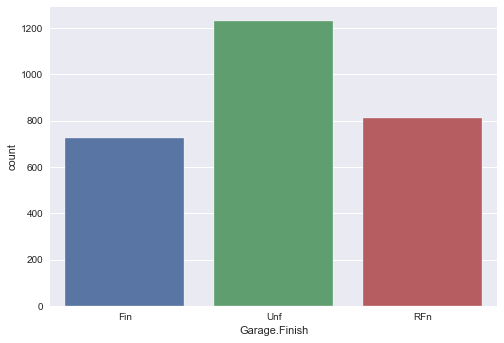

In [168]:
sns.countplot(x='Garage.Finish', data=home_price_df)
plt.show()

#### Display a count plot for Garage.Qual

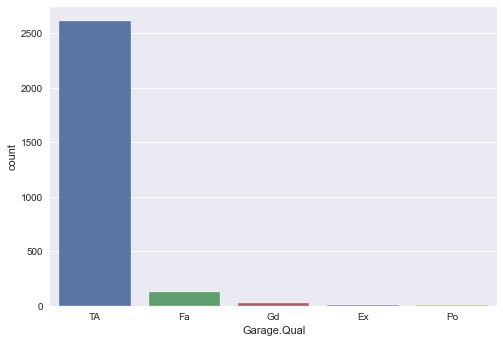

In [169]:
sns.countplot(x='Garage.Qual', data=home_price_df)
plt.show()

#### Display a count plot for Garage.Cond

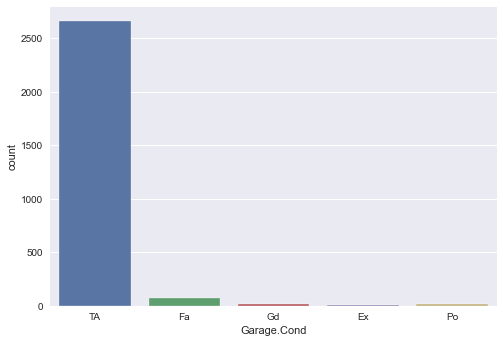

In [170]:
sns.countplot(x='Garage.Cond', data=home_price_df)
plt.show()

#### Fix index 1356 - missing values for Garage.Yr.Blt, Garage.Finish, Garage.Qual, Garage.Cond

We will use the Year.Built to fill in Garage.Yr.Blt, 'Unf' to fill Garage.Finish, 'TA' for both Garage.Qual and Garage.Cond

In [171]:
home_price_df.loc[1356, 'Garage.Yr.Blt'] = home_price_df.loc[1356, 'Year.Built']
home_price_df.loc[1356, 'Garage.Finish'] = 'Unf'
home_price_df.loc[1356, 'Garage.Qual'] = 'TA'
home_price_df.loc[1356, 'Garage.Cond'] = 'TA'

#### Replace missing values for Garage.Yr.Blt with **ZERO (0)** AND Garage.Type, Garage.Finish, Garage.Qual, and Garage.Cond with 'NA'

In [172]:
home_price_df['Garage.Yr.Blt'].fillna(0, inplace=True)
home_price_df['Garage.Type'].fillna('NA', inplace=True)
home_price_df['Garage.Finish'].fillna('NA', inplace=True)
home_price_df['Garage.Qual'].fillna('NA', inplace=True)
home_price_df['Garage.Cond'].fillna('NA', inplace=True)

#### Replace Fireplace.Qu missing values with 'NA'

The following are the acceptable values from the data dictionary:

- Ex	Excellent - Exceptional Masonry Fireplace
- Gd	Good - Masonry Fireplace in main level
- TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa	Fair - Prefabricated Fireplace in basement
- Po	Poor - Ben Franklin Stove
- NA	No Fireplace

We will use 'NA' to fill the missing values

In [173]:
home_price_df['Fireplace.Qu'].fillna('NA', inplace=True)

#### Ensure there are no more missing values

In [174]:
home_price_df.isnull().sum()

MS.Zoning         0
Street            0
Lot.Shape         0
Land.Contour      0
Utilities         0
Lot.Config        0
Land.Slope        0
Neighborhood      0
Condition.1       0
Condition.2       0
Bldg.Type         0
House.Style       0
Overall.Qual      0
Year.Built        0
Year.Remod.Add    0
Roof.Style        0
Roof.Matl         0
Exterior.1st      0
Exterior.2nd      0
Mas.Vnr.Type      0
Mas.Vnr.Area      0
Exter.Qual        0
Exter.Cond        0
Foundation        0
Bsmt.Qual         0
Bsmt.Cond         0
Bsmt.Exposure     0
BsmtFin.Type.1    0
BsmtFin.Type.2    0
Total.Bsmt.SF     0
Heating           0
Heating.QC        0
Central.Air       0
Electrical        0
X1st.Flr.SF       0
Full.Bath         0
Kitchen.Qual      0
TotRms.AbvGrd     0
Functional        0
Fireplace.Qu      0
Garage.Type       0
Garage.Yr.Blt     0
Garage.Finish     0
Garage.Cars       0
Garage.Area       0
Garage.Qual       0
Garage.Cond       0
Paved.Drive       0
Sale.Type         0
Sale.Condition    0


#### Save the cleansed data set to a csv file

In [175]:
home_price_df.to_csv('./data/ames-imputed.csv', index=False)